# Trajectory

Trajectories are computed by solving the geodesic equation in Kerr spacetime, which in Boyer-Lindquist coordinates can be written as the following system of differential equations.
\begin{equation}
\begin{aligned} & \Sigma^2\left(\frac{\mathrm{d} r}{\mathrm{~d} \tau}\right)^2=\left(\mathcal{E}\left(r^2+a^2\right)-a \mathcal{L}\right)^2-\Delta\left(r^2+(a \mathcal{E}-\mathcal{L})^2+Q\right)\\ & \Sigma^2\left(\frac{\mathrm{d} z}{\mathrm{d} \tau}\right)^2=Q-z^2\left(a^2\left(1-\mathcal{E}^2\right)\left(1-z^2\right)+\mathcal{L}^2+Q\right) \\ & \Sigma \frac{\mathrm{d} t}{\mathrm{~d} \tau}=\frac{\left(r^2+a^2\right)}{\Delta}\left(\mathcal{E}\left(r^2+a^2\right)-a \mathcal{L}\right)-a^2 \mathcal{E}\left(1-z^2\right)+a \mathcal{L}\\ & \Sigma \frac{\mathrm{d} \phi}{\mathrm{d} \tau}=\frac{a}{\Delta}\left(\mathcal{E}\left(r^2+a^2\right)-a \mathcal{L}\right)+\frac{\mathcal{L}}{1-z^2}-a \mathcal{E} 
\end{aligned}
\end{equation}
Here, $\Delta=r^2-2 M r+a^2$, $\Sigma=r^2+a^2 \cos ^2 \theta$ and $z = \cos{\theta}$. $\mathcal{E}$, $\mathcal{L}$, and $\mathcal{Q}$ represent the energy, angular momentum, and Carter constant respectively. In order to solve this system analytically, the trajectory must be reparametrized in terms of a new parameter $\lambda$ which is defined such that $\frac{d\tau}{d\lambda} = \Sigma$. This new parameter is known as Mino time.

## Bound Orbits

Taking $M$ to represent the mass of the primary body and working in dimensionless units where $G=c=M=1$, bound orbits are parametrized using the following variables:

$a$ - spin of the primary body
<br>
$p$ - orbital semilatus rectum ($\frac{2r_{\text{min}}r_{\text{max}}}{r_{\text{min}}+r_{\text{max}}}$)
<br>
$e$ - orbital eccentricity ($\frac{r_{\text{max}}-r_{\text{min}}}{r_{\text{max}}+r_{\text{min}}}$)
<br>
$x$ - cosine of the orbital inclination ($\cos{\theta_{\text{inc}}}$)
<br>

Note that $a$ and $x$ are restricted to values between -1 and 1, while $e$ is restricted to values between 0 and 1. Retrograde orbits are represented using a negative value for $a$ or for $x$. Polar orbits, marginally bound orbits, and orbits around an extreme Kerr black hole are not supported. 

### Stability


Note that not all combinations of orbital parameters define a stable orbit. The boundary in parameter space between stable and unstable orbits is known as the separatrix. It is most convenient to think of the separatrix as defining a minimum stable value of $p$ for a given set of parameters $(a,e,x)$. Use the [`separatrix()`](constants.separatrix) method to compute this minimum value.

In [1]:
import kerrgeopy as kg
from math import pi, cos

kg.separatrix(0.9,0.6,cos(pi/3))

4.462323556641868

Use the [`is_stable()`](constants.is_stable) method to test if an orbit is stable. Running `kg.is_stable(a,p,e,x)` is equivalent to checking if `p >= kg.separatrix(a,e,x)`

In [2]:
kg.is_stable(0.9,5,0.6,cos(pi/3))

True

In [6]:
kg.is_stable(0.9,4,0.6,cos(pi/3))

False

### Trajectory

To compute a trajectory, first construct a [`BoundOrbit`](bound_orbit.BoundOrbit) by specifying the four orbital parameters described above. Then use the [`trajectory()`](bound_orbit.BoundOrbit.trajectory) method to compute the time, radial, polar and azimuthal components of the trajectory as a function of Mino time. Use the `initial_phases` option to set the initial phases $(q_{t_0},q_{r_0},q_{\theta_0},q_{\phi_0})$ of the orbit. Phases are defined as follows:

\begin{equation}
\begin{aligned}
q_t &= \Gamma \lambda\\
q_r &= \Upsilon_r \lambda \\
q_\theta &= \Upsilon_\theta \lambda\\
q_\phi &= \Upsilon_\phi \lambda
\end{aligned}
\end{equation}

Here, $\Gamma$ is the average rate at which Mino time accumulates in observer time, and $\Upsilon_r$, $\Upsilon_\theta$ and $\Upsilon_\phi$ are the orbital frequencies of motion in $r$, $\theta$ and $\phi$ respectively. By default, all phases are set to zero and the trajectory is computed assuming the initial conditions $r_0 = r_{\text{min}}$ and $\theta_0 = \theta_{\text{min}}$. In order to start the orbit from $r_{\text{max}}$ instead, set $q_{r_0} = \pi$.

In [48]:
orbit = kg.BoundOrbit(0.9,5,0.6,cos(pi/3))

t, r, theta, phi = orbit.trajectory(initial_phases=(0,pi,0,0))

Text(0, 0.5, '$\\phi(\\lambda)$')

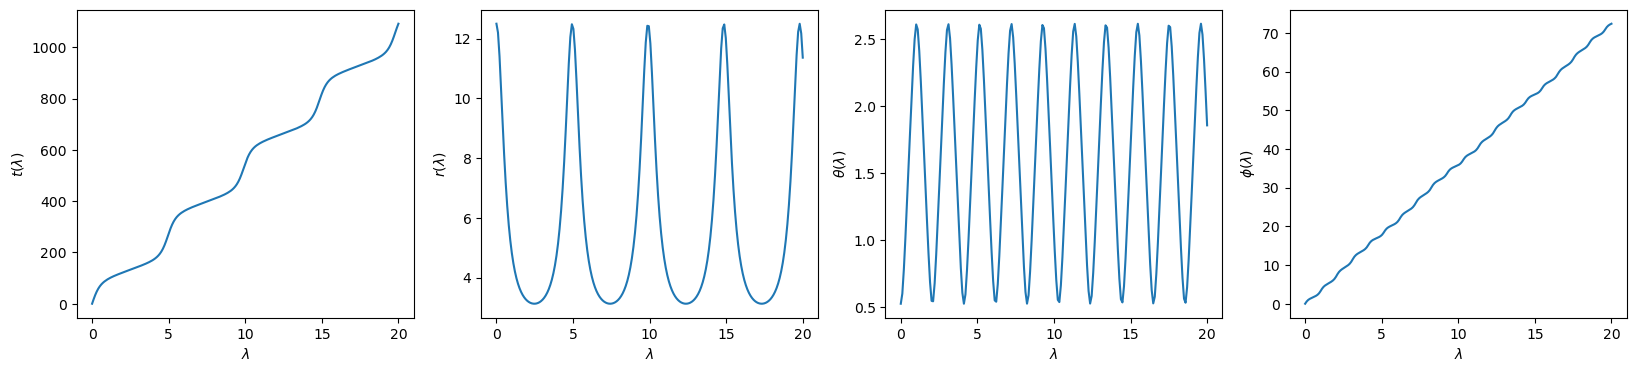

In [49]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

### Physical Units

 If the masses of the two bodies are specified, the radial and time components of the trajectory can also be computed in physical units. `M` and `mu` define the mass of the primary and secondary body respectively in solar masses. Use the `distance_units` and `time_units` options to set units for the radial and time components. See the [`trajectory()`](bound_orbit.BoundOrbit.trajectory) documentation page for a full list of available units.

In [46]:
orbit = kg.BoundOrbit(0.9,5,0.6,cos(pi/3), M=1e6, mu=10)

t, r, theta, phi = orbit.trajectory(distance_units='au', time_units='mks')

Text(0, 0.5, '$\\phi(\\lambda)$')

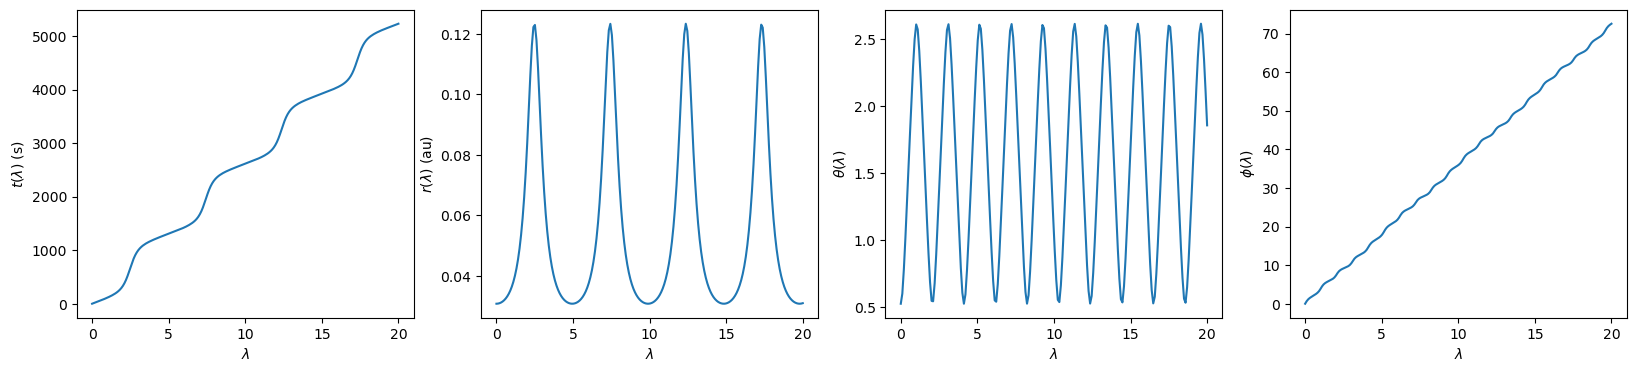

In [47]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$ (s)")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$ (au)")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Plunging Orbits

Plunging orbits are parametrized using the spin parameter and the three constants of motion.

$a$ - dimensionless spin of the primary
<br>
$\mathcal{E}$ - dimensionless energy
<br>
$\mathcal{L}$ - dimensionless angular momentum
<br>
$Q$ - dimensionless carter constant
<br>

Construct a [`PlungingOrbit`](plunging_orbit.PlungingOrbit) by passing in these four parameters and use the [`trajectory()`](plunging_orbit.PlungingOrbit.trajectory) method to compute the trajectory. As with non-plunging orbits, the `initial_phases` option sets the initial phases $(q_{t_0},q_{r_0},q_{\theta_0},q_{\phi_0})$ and the `distance_units` and `time_units` options can be used to specify units if `M` and `mu` are given.

In [37]:
orbit = kg.PlungingOrbit(0.9, 0.94, 0.1, 12, M=1e6, mu=10)

t, r, theta, phi = orbit.trajectory(initial_phases=(0,pi,0,0),
                                    distance_units="au", 
                                    time_units="mks"
                                    )

Text(0, 0.5, '$\\phi(\\lambda)$')

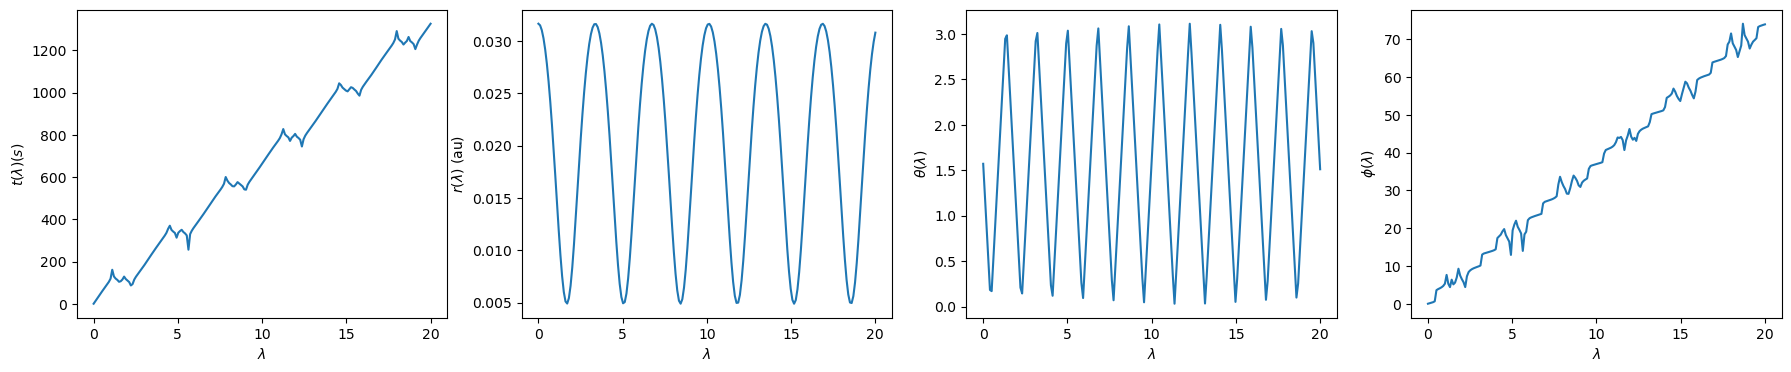

In [38]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(22,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda) (s)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$ (au)")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Spacetime

Kerrgeopy provides a [`KerrSpacetime`](spacetime.KerrSpacetime) class to model the spacetime around a spinning black hole. Construct a [`KerrSpacetime`](spacetime.KerrSpacetime) by passing in a dimensionless spin $a$ and mass $M$ in solar masses.

In [39]:
spacetime = kg.KerrSpacetime(a=0.99,M=1e6)

### Metric

Use the [`metric()`](spacetime.KerrSpacetime.metric) method to evaluate the matrix representation of the metric tensor at a given point in Boyer-Linquist coordinates. For example, to compute the metric tensor at $(t=0,r=5,\theta=\pi/2,\phi=0)$, run the following code.

In [40]:
spacetime.metric(0,5,pi/2,0)

array([[-0.6       ,  0.        ,  0.        , -0.396     ],
       [ 0.        ,  1.56444578,  0.        ,  0.        ],
       [ 0.        ,  0.        , 25.        ,  0.        ],
       [-0.396     ,  0.        ,  0.        , 26.37214   ]])

### Four-Velocity

Use the [`four_velocity()`](spacetime.KerrSpacetime.four_velocity) method to compute the components of the four velocity by passing in the components of the trajectory and the constants of motion. This method computes the four velocity by subsituting the trajectory and constants of motion into the geodesic equation at the top of this page.

In [41]:
orbit = kg.BoundOrbit(0.99,7,0.2,cos(pi/3))

t, r, theta, phi = orbit.trajectory()
constants = orbit.constants_of_motion()

t_prime, r_prime, theta_prime, phi_prime = spacetime.four_velocity(t,r,theta,phi,constants)

The [`norm()`](spacetime.KerrSpacetime.norm) method computes the norm of a four vector, defined as $g_{\mu\nu}u^{\mu}u^{\nu}$, at a given point in spacetime. We can use this method to verify that the trajectory computed above is a geodesic by checking that the norm of the four-velocity is -1.

In [42]:
u = t_prime(1), r_prime(1), theta_prime(1), phi_prime(1)

spacetime.norm(t(1),r(1),theta(1),phi(1),u)

-1.0001926442209133

(-2.0, 0.0)

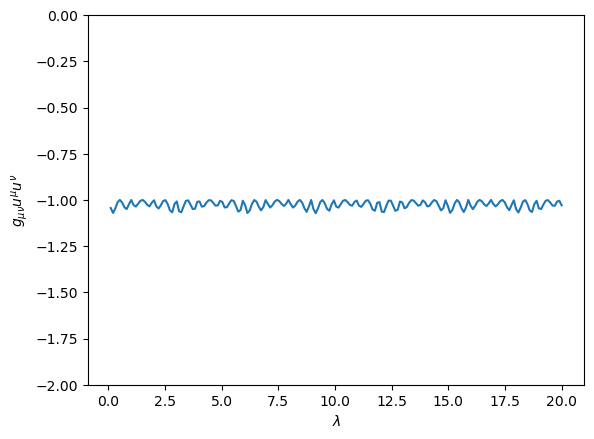

In [45]:
mino_time = np.linspace(0,20,200)

four_velocity_norm = [spacetime.norm(
                            t(time),r(time),theta(time),phi(time),
                            [t_prime(time), r_prime(time), theta_prime(time), phi_prime(time)]
                            ) 
                        for time in mino_time]

plt.plot(mino_time, four_velocity_norm)
plt.xlabel(r"$\lambda$")
plt.ylabel("$g_{\\mu\\nu}u^{\\mu}u^{\\nu}$")
plt.ylim(-2,0)

## Initial Conditions

In Progress